In [1]:
import os
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
IMAGES_PATH = 'img/'

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
T = pd.read_csv('series/'+'obs_h'+'.csv',header=0,index_col=0,parse_dates=True)

TQ_bool = T.resample('M').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

In [3]:
select = TQ_bool_sum.index.values[TQ_bool_sum>105]
print('Station selected: ',len(TQ_bool[select].columns))

Station selected:  33


In [4]:
T = T[select]
nstation = len(T.columns)

In [5]:
T_cont = T.dropna(how='any')

In [6]:
T_cont['tdiff'] = np.zeros(len(T_cont))
T_cont.loc[1:,'tdiff'] = (T_cont.index[1:]-T_cont.index[:-1])/pd.Timedelta('1H')

/home/larry/anaconda3/envs/nn/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/larry/anaconda3/envs/nn/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/larry/anaconda3/envs/nn/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [7]:
period = 48
T_cont['isSample'] = T_cont['tdiff'].rolling(period-1).sum()==(period-1)
T_avail = T_cont[T_cont['isSample']]

/home/larry/anaconda3/envs/nn/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Saving figure 021_data_split
Period =  48
Available periods =  7700


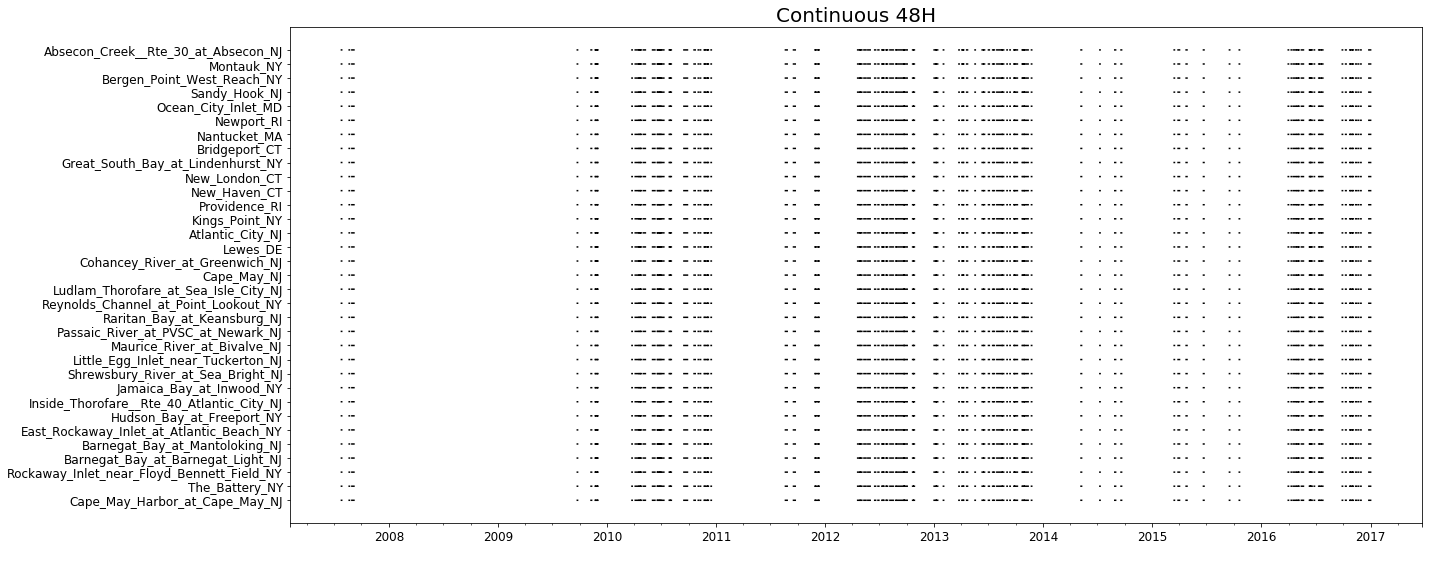

In [8]:
TQ_bool = T_avail.iloc[:,:-2].resample('D').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

ax = TQ.plot(legend=False,figsize=(20,8),yticks=range(nstation),color='k')
ax.set_yticklabels(list(TQ_bool_sum.index.values));
ax.set_xlabel(' ');
ax.set_title('Continuous 48H',fontsize=20);
save_fig("021_data_split");

print("Period = ", period)
print("Available periods = ", len(T_avail))

In [9]:
T = T_avail

In [10]:
T['month'] = T.index.month

/home/larry/anaconda3/envs/nn/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


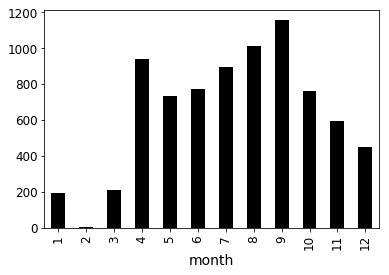

In [11]:
T.groupby('month').count().iloc[:,0].plot('bar',color='k');

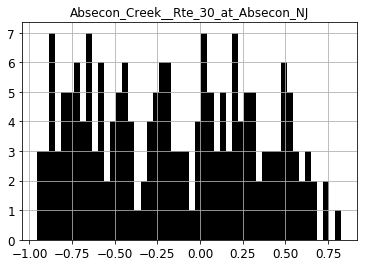

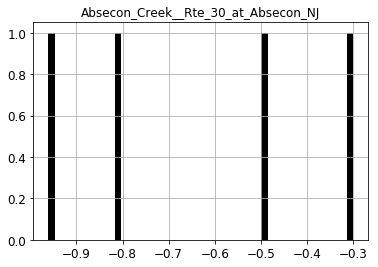

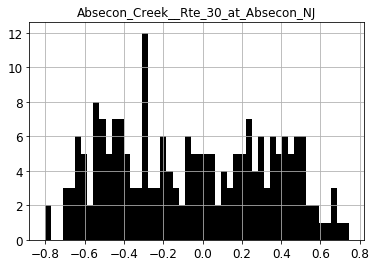

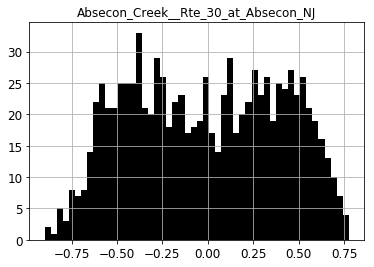

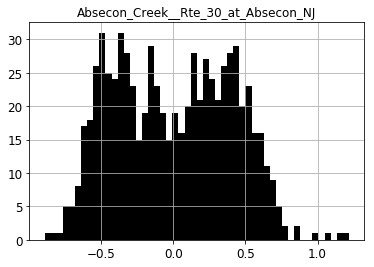

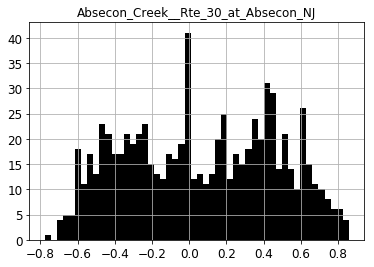

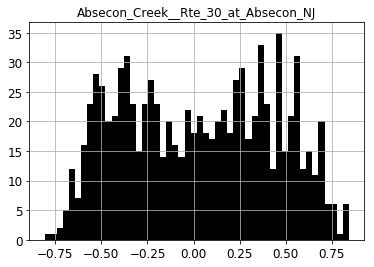

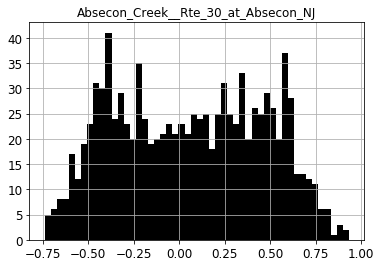

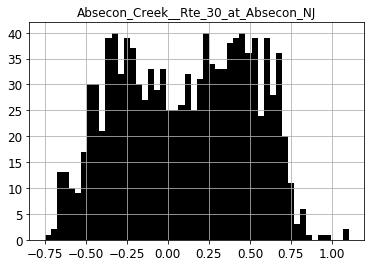

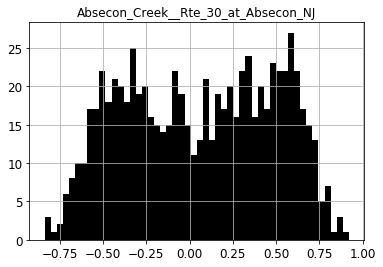

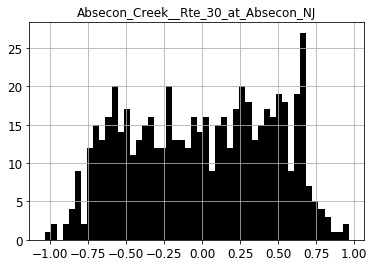

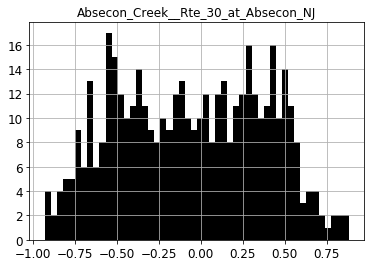

In [12]:
T.iloc[:,[0,-1]].groupby('month').hist(bins=50,color='k');

In [13]:
x = np.linspace(0,np.pi*2,1000)
y = np.sin(x)

y_mean = y.mean()
y_std = y.std()

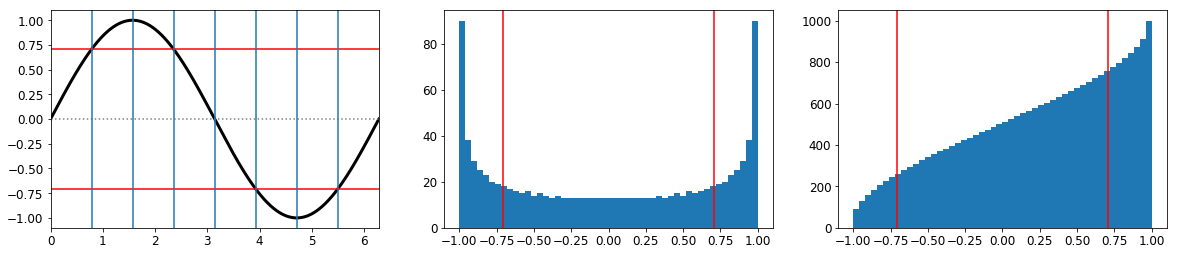

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax[0].plot(x,y,'k-',linewidth=3);
ax[0].axhline(0,linestyle=':',color='grey');
ax[0].set_xlim([min(x),max(x)]);
ax[0].axhline(y_std,linestyle='-',color='red');
ax[0].axhline(-y_std,linestyle='-',color='red');
for i in range(7):
    ax[0].axvline(np.arcsin(y_std)*(i+1))

ax[1].hist(y,bins=50);
ax[1].axvline(y_std,linestyle='-',color='red');
ax[1].axvline(-y_std,linestyle='-',color='red');

ax[2].hist(y,bins=50,cumulative=True);
ax[2].axvline(y_std,linestyle='-',color='red');
ax[2].axvline(-y_std,linestyle='-',color='red');

In [15]:
print('y < mean-std: ', len(y[(y<-y_std)])/len(y))
print('mean-std <= y < mean+std: ', len(y[(y>=-y_std) & (y<y_std)])/len(y))
print('y >= mean+std: ', len(y[(y>=y_std)])/len(y))
print('1 section = ', np.arcsin(y_std)/np.pi, '(pi)')

y < mean-std:  0.25
mean-std <= y < mean+std:  0.5
y >= mean+std:  0.25
1 section =  0.24984084503038229 (pi)


In [10]:
T_mean = T.groupby('month').mean()
T_std = T.groupby('month').std()
T_lbound = T_mean-T_std
T_hbound = T_mean+T_std
T_topbot = np.zeros(T.values[:,:-1].shape).astype(bool)
for i in range(1,13):
    T_month = T[T['month']==i].values[:,:-1]
    T_topbot[T['month']==i] = ((T_month<=np.tile([T_lbound.loc[1].values],[len(T_month),1])) | 
                                 (T_month>np.tile([T_hbound.loc[1].values],[len(T_month),1])))
T_cat = np.tile(T['month'].values.astype(int)*10,(len(T.columns)-1,1)).T+T_topbot.astype(int)

/home/larry/anaconda3/envs/nn/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  
/home/larry/anaconda3/envs/nn/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [14]:
T_cat.shape

(86203, 33)

In [15]:
T.shape

(86203, 34)

In [26]:
T[T.index.year==2016].shape

(8784, 34)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [29]:
T.values[:,:-1].shape

(86203, 33)

In [30]:
T_cat.shape

(86203, 33)

In [31]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=8)
for train_index, test_index in split.split(T.values[:,:-1], T_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.